In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df= pd.read_csv('iris1.csv')
print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [37]:
print(df.shape)

(150, 5)


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [39]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

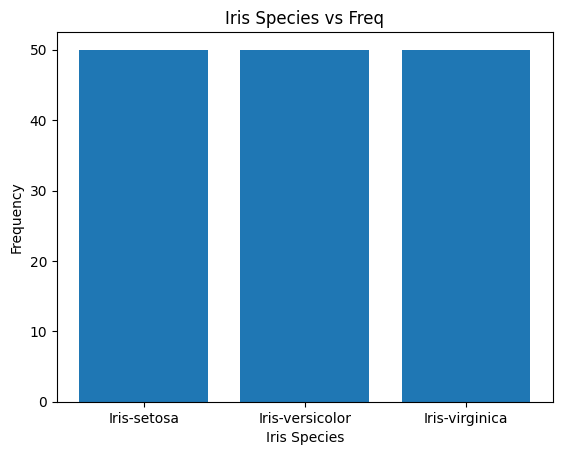

<Figure size 640x480 with 0 Axes>

In [41]:
plt.bar(x=df['Species'].unique(),height=df['Species'].value_counts())
plt.xlabel('Iris Species')
plt.ylabel('Frequency')
plt.title('Iris Species vs Freq')
plt.show()
plt.savefig('plot.png')

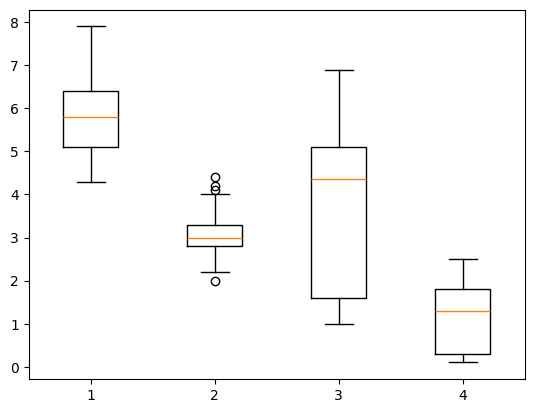

In [42]:
plt.boxplot(df.drop(columns=['Species']))
plt.savefig('boxplot.png')

In [43]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [46]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

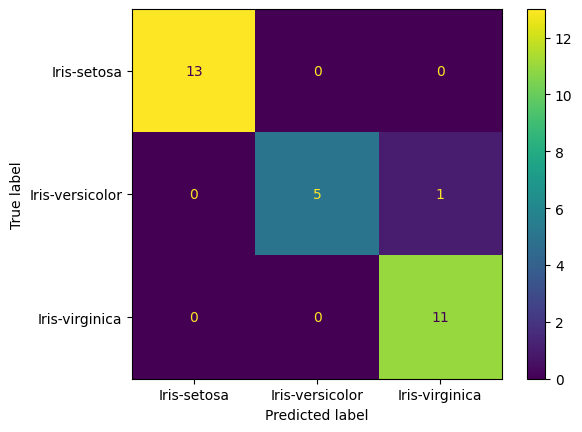

In [47]:
cm=confusion_matrix(y_test,y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix= cm,
                                 display_labels= df['Species'].unique())
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [48]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.1,1.5,0.1
138,6.0,3.0,4.8,1.8
87,6.3,2.3,4.4,1.3
42,4.4,3.2,1.3,0.2
8,4.4,2.9,1.4,0.2
90,5.5,2.6,4.4,1.2


In [49]:
y_test

72     Iris-versicolor
112     Iris-virginica
132     Iris-virginica
88     Iris-versicolor
37         Iris-setosa
138     Iris-virginica
87     Iris-versicolor
42         Iris-setosa
8          Iris-setosa
90     Iris-versicolor
141     Iris-virginica
33         Iris-setosa
59     Iris-versicolor
116     Iris-virginica
135     Iris-virginica
104     Iris-virginica
36         Iris-setosa
13         Iris-setosa
63     Iris-versicolor
45         Iris-setosa
28         Iris-setosa
133     Iris-virginica
24         Iris-setosa
127     Iris-virginica
46         Iris-setosa
20         Iris-setosa
31         Iris-setosa
121     Iris-virginica
117     Iris-virginica
4          Iris-setosa
Name: Species, dtype: object

In [50]:
ans=knn.predict([[5.5,2.6,4.4,1.2]])
print(ans[0])

Iris-versicolor


/opt/anaconda3/envs/AI/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
import joblib
joblib.dump(knn,'knn_model.joblib')
print('Success')


Success
